## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, episode,min_epsilon,max_epsilon,decay_rate):
    #epsilon = np.random.random()
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)
    else:
        agent_actions, env_actions = env.action_space(state)
#         print(list(agent_actions))
        action = random.choice(list(agent_actions))
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [6]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [7]:
# Initialise states to be tracked
def initialise_tracking_states():
    samples = [('x-x-x-x-x-x-x-x-x',(5,1)),('3-x-x-x-2-x-x-x-x',(7,5)),
    ('x-3-x-x-1-x-x-x-x',(4,5)),('1-3-x-x-x-x-6-2-x',(8,7))]
    for q_values in samples:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []
  
  
  

In [8]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [9]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [10]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [279]:
EPISODES = 100000 #500000
LR = 0.01                   # learning rate
GAMMA = 0.9               # discount factor

max_epsilon = 1.0
min_epsilon = 0.00001
decay_rate = 0.0001 # 0.001       # epsilon decay rate
threshold = 300       # no of episodes after which states_tracked wwill be saved
policy_threshold = 300   # no of episodes after which Q dictionary/table will be saved

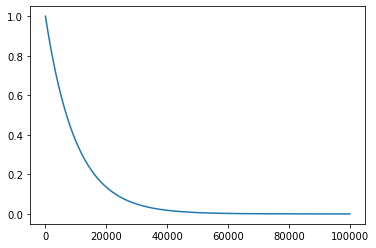

In [280]:
# max_epsilon = 1.0
# min_epsilon = 0.00001
start_time = np.arange(0,EPISODES)
# decay_rate = 0.000009
epsilon = []
for i in range(0,EPISODES):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*i))

plt.plot(start_time, epsilon)
plt.show()

### Q-update loop ---write your code here

In [281]:
import time 

In [282]:
start_time = time.time()
for episode in range(EPISODES):
    if episode%5000 == 0:
        print(f"Finished {episode} episode")
        #LR = decay_rate*LR
    env = TicTacToe()
    curr_state = env.state
    isTerminated = False
    add_to_dict(curr_state)
    total_reward = 0

    while not isTerminated:
        current_state_ele = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode,min_epsilon,max_epsilon,decay_rate)
        next_state, reward, isTerminated = env.step(curr_state, curr_action)

        next_state_ele = Q_state(next_state)
        add_to_dict(next_state)

        if isTerminated:
            Q_dict[current_state_ele][curr_action] += LR * (
                (reward - Q_dict[current_state_ele][curr_action]))
        else:
            max_next = max(Q_dict[next_state_ele],
                           key=Q_dict[next_state_ele].get)
            Q_dict[current_state_ele][curr_action] += LR * (
                (reward + (GAMMA * (Q_dict[next_state_ele][max_next]))) -
                Q_dict[current_state_ele][curr_action])

        curr_state = next_state
        total_reward += reward

    # Tracking the Q-Values here
    
    if (episode == threshold-1):        
        initialise_tracking_states()

    if ((episode+1) % threshold) == 0:  
        save_tracking_states()
        save_obj(States_track,'States_tracker1')

    # Saving the Policy here
    
    if ((episode+1)% policy_threshold ) == 0: 
        save_obj(Q_dict,'Q_value_policy1')
    
    
elapsed_time = time.time() - start_time
save_obj(States_track, 'States_tracker1')
save_obj(Q_dict, 'Q_value_policy1')
print(elapsed_time)

Finished 0 episode
Finished 5000 episode
Finished 10000 episode
Finished 15000 episode
Finished 20000 episode
Finished 25000 episode
Finished 30000 episode
Finished 35000 episode
Finished 40000 episode
Finished 45000 episode
Finished 50000 episode
Finished 55000 episode
Finished 60000 episode
Finished 65000 episode
Finished 70000 episode
Finished 75000 episode
Finished 80000 episode
Finished 85000 episode
Finished 90000 episode
Finished 95000 episode
1405.229163646698


#### Check the Q-dictionary

In [283]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.385524070379517,
              (0, 3): -1.3852726005503866,
              (0, 5): -1.3853998116021686,
              (0, 7): -1.3853209710522403,
              (0, 9): -1.3855022102896148,
              (1, 1): -1.3855820838669841,
              (1, 3): -1.3852584371267387,
              (1, 5): -1.3853108031572836,
              (1, 7): -1.3855264306660657,
              (1, 9): -1.3852278195541161,
              (2, 1): -1.38574342278839,
              (2, 3): -1.385514922240335,
              (2, 5): -1.3854898627983046,
              (2, 7): -1.385834699382185,
              (2, 9): -0.7315103879795821,
              (3, 1): -1.3855641413776876,
              (3, 3): -1.385286480083095,
              (3, 5): -1.3857048463871646,
              (3, 7): -1.3852137490159202,
              (3, 9): -1.385552860411062,
              (4, 1): -1.3855855739817373,
              (4, 3): -1.3852015488026894,
              (4, 5): 

In [284]:
len(Q_dict)

1144440

In [298]:
print("\n".join([i for i in Q_dict.keys()][:500]))

x-x-x-x-x-x-x-x-x
x-x-x-x-x-6-x-x-3
2-x-x-x-1-6-x-x-3
2-4-x-5-1-6-x-x-3
2-4-8-5-1-6-9-x-3
x-x-x-x-x-x-3-2-x
x-x-7-x-8-x-3-2-x
5-x-7-x-8-4-3-2-x
5-9-7-x-8-4-3-2-6
x-x-x-x-x-7-x-4-x
x-x-x-9-2-7-x-4-x
6-x-5-9-2-7-x-4-x
6-8-5-9-2-7-x-4-1
x-x-5-x-x-x-2-x-x
x-x-5-x-x-x-2-3-6
7-x-5-x-x-4-2-3-6
7-x-x-x-x-x-x-x-8
7-x-x-x-4-x-3-x-8
7-x-x-6-4-5-3-x-8
7-x-x-x-x-x-8-x-x
7-x-4-x-1-x-8-x-x
7-5-4-x-1-2-8-x-x
7-5-4-9-1-2-8-6-x
x-6-x-x-x-5-x-x-x
x-6-x-4-x-5-x-x-9
7-6-x-4-2-5-x-x-9
7-6-8-4-2-5-1-x-9
x-1-x-x-6-x-x-x-x
x-1-x-x-6-x-8-x-3
5-1-x-x-6-x-8-2-3
5-1-4-9-6-x-8-2-3
x-x-x-x-x-x-x-4-5
x-x-3-x-x-x-6-4-5
x-x-9-x-8-x-x-x-x
x-x-9-x-8-x-1-x-6
4-x-9-x-8-x-1-7-6
4-3-9-x-8-2-1-7-6
2-x-x-x-x-x-x-9-x
2-x-8-x-x-1-x-9-x
2-x-8-x-x-1-4-9-7
2-x-8-x-3-1-4-9-7
x-x-5-x-2-x-x-x-x
x-9-5-4-2-x-x-x-x
x-9-5-4-2-8-7-x-x
1-9-5-4-2-8-7-x-x
4-1-x-x-x-x-x-x-x
4-1-2-x-x-x-7-x-x
4-1-2-x-x-9-7-8-x
4-1-2-3-x-9-7-8-6
5-x-x-x-x-2-x-x-x
5-4-1-x-x-2-x-x-x
5-4-1-6-7-2-x-x-x
x-4-x-x-x-x-5-x-x
x-4-6-x-9-x-5-x-x
2-4-6-1-9-x-5-x-x
2-4-6-1-9-

In [308]:
Q_dict.get("4-7-x-6-x-x-x-x-9","")

{(2, 1): 0,
 (2, 3): 0,
 (2, 5): 0,
 (4, 1): 0,
 (4, 3): 0,
 (4, 5): 0,
 (5, 1): 0,
 (5, 3): 0,
 (5, 5): 0,
 (6, 1): 0,
 (6, 3): -0.01,
 (6, 5): 0.29701,
 (7, 1): 0,
 (7, 3): 0,
 (7, 5): 0}

#### Play the Game

In [289]:
def display_table(played_num):
    for i in range(3):
        for j in range(3):
            pos = i*3+j
            print(f"{played_num[pos]: <3}",end="|")
        print()
        

In [290]:
from IPython.display import clear_output

In [294]:
while True:
    clear_output(wait=False)
    played_pos = []
    first = False 
    played_num = [np.nan for i in range(9)]
    index = 0
    try:
        while index<9:
            state = "-".join(["x"  if np.isnan(i) else str(i) for i in played_num])
            print(state)
            if not first:
                pos,action = max(Q_dict[state],key=Q_dict[state].get)
                played_pos.append(pos)
                played_num[pos] = action
            else:
                first = False
                pos = random.choice(range(9))
                action = random.choice(range(1,10,2))
                played_pos.append(pos)
                played_num[pos] = action
                

            index+=1
            display_table(played_num)
            if env.is_winning(played_num):
                print("computer_win")
                break


            print("player turn")
            print("Available position are ")
            print("-".join([str(i) for i in range(9) if i not in played_pos]))
            print("Available number to play are "+"-".join([str(i) for i in range(2,10,2) if i not in played_num]))
            pos = 0
            action = 0
            while True:
                display_table(played_num)
                pos,action = map(int,input("play position and number").split(" "))
                if pos in [i for i in range(9) if i not in played_pos]:
                    if action in [i for i in range(2,10,2) if i not in played_num]:
                        break

            played_pos.append(pos)
            played_num[pos] = action

            index+=1
            if env.is_winning(played_num):
                print("user_win")
                break


            clear_output(wait=False)
        else:
            print("Tie")
    except:
        print("""Oooooooooooooooooops, confused !!!!!!!!!""")
    if int(input("Do you want to continue?(0/1)")) == 0:
        break
        

6-8-9-7-1-5-4-2-x
Oooooooooooooooooops, confused !!!!!!!!!
Do you want to continue?(0/1)0


In [ ]:
played_num

In [ ]:
env.is_winning(played_num)